In [1]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_samples. silhouette_score
from pandas import DataFrame
#from sclpy.stats import entropy
#from math import log,e
import matplotlib.pyplot as plt
#import matplotlib.cm as cm
import numpy as np
import pandas as pd

<h1>군집비교

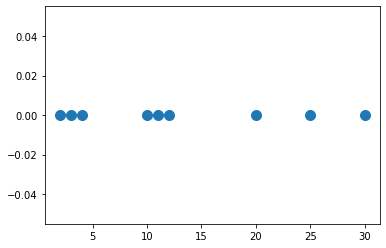

In [2]:
X = np.array([[2,0],[3,0],[4,0],[10,0],[11,0],[12,0],[20,0],[25,0],[30,0]])
plt.scatter(X[:,0],X[:,1],s=100)
plt.show()

<h3>1회차 vs 10회차

In [55]:
#1회차
model1 = KMeans(n_clusters = 2 , init = np.array([[3,0],[4,0]]),
                n_init=1, max_iter =1 , random_state =1 ).fit(X)

c0, c1 = model1.cluster_centers_
c0, c1

(array([2.5, 0. ]), array([16.,  0.]))

In [9]:
#10회차 kmeans, k-centroid(중심에 가까운 데이터가 중요할 때)

#model10 = KMeans(n_clusters = 2 , init ='random',
                #n_init=1, max_iter =10 , random_state =1 ).fit(X) 

    
model10 = KMeans(n_clusters = 2 , init = 'k-means++',
                n_init=1, max_iter =10 , random_state =1 ).fit(X) 
#랜덤보다 더 좋음 

c0, c1 = model10.cluster_centers_ ##군집분석 돌린 결과 새로운 중심이 저장 
c0, c1

(array([7., 0.]), array([25.,  0.]))

군집도, 분리도 비교 

In [10]:
#군집도 비교
model1.score(X), model10.score(X)
#절댓값으로 해석하면 된다

(-372.75, -150.0)

In [12]:
#분리도 비교
np.mean(X[:,0]),np.mean(X[model1.labels_==0,0]),np.count_nonzero(X[model1.labels_==0,0])
#전체 평균, 0번군집 평균 , 개수 

(13.0, 3.0, 3)

In [13]:
#10회차 군집의 평균,개수
np.mean(X[:,0]),np.mean(X[model10.labels_==1,0]),np.count_nonzero(X[model10.labels_==1,0])

(13.0, 25.0, 3)

In [112]:
def k_separation(model1,c0,c1):
    total_mean = np.mean(X[:,0])
    m1 = np.mean(X[model1.labels_ == 0,0])
    m2 = np.mean(X[model1.labels_ == 1,0])
    count1 = np.count_nonzero(X[model1.labels_,0] == 2)
    count2 = np.count_nonzero(X[model1.labels_,0] == 3)
    separation = count1*(total_mean - m1)**2 + count2*(total_mean - m2)**2
    print(separation)

In [23]:
k_separation(model1,c0,c1), k_separation(model10,c0,c1)

450.0
648.0


(None, None)

유사도 매트릭스 비교

In [20]:
#유사도 매트릭스 비교 

list1=[]

def s_matrix(model):
    for i in range(0,np.count_nonzero(X)):
        list1.append([])
        for j in range(0,np.count_nonzero(X)):
            if model.labels_[i]== model.labels_[j]:
                list1[i].append(1)
            else:
                list1[i].append(0)


In [21]:
list1=[]
s_matrix(model1)
list1

[[1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1]]

In [24]:
list1=[]
s_matrix(model10)
list1

[[1, 1, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 1]]

In [ ]:
list1=[]
s_matrix(model1)
list1

In [51]:
#k=3 군집3개
model3 = KMeans(n_clusters = 3 ,
                n_init=1, max_iter =50 , random_state =1 ).fit(X)

c0, c1, c2 = model3.cluster_centers_
c0, c1, c2

(array([13.25,  0.  ]), array([27.5,  0. ]), array([3., 0.]))

In [27]:
list1=[]
s_matrix(model3)
list1
#위 두 모델보다 괜찮아보임 

[[1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 1, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 1]]

엔트로피 비교 

In [56]:
#엔트로피
def entropy(labels):
    n_labels = len(labels)
    
    if n_labels <= 1 :
        return 0 
    
    counts = np.bincount(labels)
    probs = counts[np.nonzero(counts)] / n_labels
    n_classes = len(probs)
    
    if n_classes <= 1:
        return 0
    
    return - np.sum(probs * np.log(probs))/np.log(n_classes)
    

In [53]:
#비교를 위해 k=2 2회차 모델 생성
model2 = KMeans(n_clusters = 2 , init = np.array([[3,0],[4,0]]),
                n_init=1, max_iter =2 , random_state =1 ).fit(X)

c0, c1 = model2.cluster_centers_
c0, c1

(array([3., 0.]), array([18.,  0.]))

In [29]:
#2회차 vs 1회차 비교
def plot_cluster(model , c0, c1):
    plt.scatter(X[model.labels_==0,0],
                X[model.labels_==0,1],s=100 , c='r', marker='v')
    plt.scatter(X[model.labels_==1,0],
                X[model.labels_==1,1],s=100 , c='b', marker='^')
    plt.scatter(c0[0],c0[1],s=200,c='r')
    plt.scatter(c1[0],c1[1],s=200,c='b')
    plt.show()

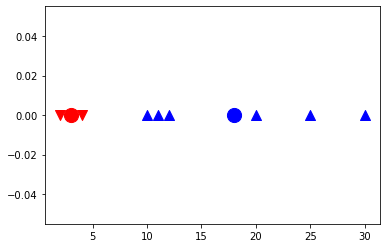

In [30]:
plot_cluster(model1,c0,c1)

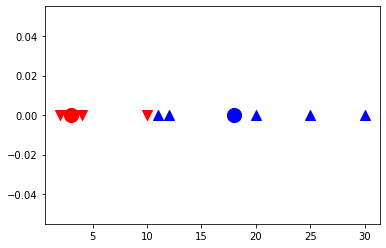

In [31]:
plot_cluster(model2,c0,c1)

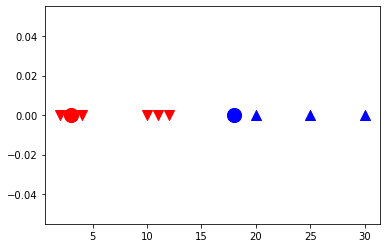

In [32]:
plot_cluster(model10,c0,c1)
#2회차의 c0,c1이 찍힘 

In [57]:
#엔트로피 비교
entropy(model1.labels_),entropy(model2.labels_),entropy(model10.labels_)

(0.9182958340544894, 0.9910760598382222, 0.9182958340544894)

In [58]:
entropy(model3.labels_)

0.965633607142825

preswot 문제 실습 

In [69]:
X = np.array([[3, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0],  [13, 0], [18, 0], 
              [20, 0], [23, 0], [24, 0], [25, 0], [30, 0]])
model = KMeans(n_clusters=2, init='random', n_init=20,
               max_iter=100, random_state=1).fit(X)

c0, c1 = model.cluster_centers_ ##군집분석 돌린 결과 새로운 중심이 저장 
c0, c1

(array([9.42857143, 0.        ]), array([23.33333333,  0.        ]))

In [96]:
k_separation(model)

392.40499671268884


In [74]:
model.score(X), k_separation(model,c0,c1), entropy(model.labels_)

392.40499671268884


(-153.04761904761904, None, 0.9957274520849256)

In [89]:
X = np.array([[3, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0],  [13, 0], [18, 0], 
              [20, 0], [23, 0], [24, 0], [25, 0], [30, 0]])

model1 = KMeans(n_clusters=3, init='random', n_init=1,
               max_iter=10, random_state=1).fit(X)
c0, c1, c2 = model1.cluster_centers_ ##군집분석 돌린 결과 새로운 중심이 저장 
c0, c1 ,c2
#model2 = KMeans(n_clusters=3, init='random', n_init=1,
               #max_iter=1, random_state=1).fit(X)


(array([5.5, 0. ]), array([11.,  0.]), array([23.33333333,  0.        ]))

In [94]:
model1.score(X),k_separation(model1)

46.970414201183445


(-109.83333333333331, None)

<h1> SSE 기반의 k 탐색

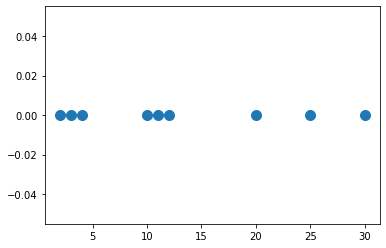

In [98]:
X = np.array([[2,0],[3,0],[4,0],[10,0],[11,0],[12,0],[20,0],[25,0],[30,0]])
plt.scatter(X[:,0],X[:,1],s=100)
plt.show()

In [99]:
ks = range(1,10)
SSE = []

for k in ks:
    model = KMeans(n_clusters=k).fit(X)
    SSE.append(model.inertia_) #응집도 추가(in error~의 약자)
SSE

##어느정도 값이 많이 줄어드는 k=5 까지 괜찮을 거라고 봄 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[798.0, 150.0, 54.0, 16.5, 4.0, 2.5, 1.0, 0.5, 0.0]

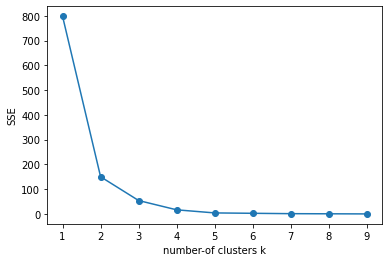

In [100]:
plt.plot(ks,SSE,'-o')
plt.xlabel('number-of clusters k')
plt.ylabel('SSE')
plt.show()

#대체적인 기울기로 보면 k=3까지 괜찮을거라고 봄 

preswot 문제 실습 (K-means 2차원 데이터)

In [101]:
X = np.array([[7, 5], [5, 7], [7, 7], [4, 4], [4, 6], [1, 4],
              [0, 0], [2, 2], [8, 7], [6, 8], [5, 5], [3, 7]])

In [102]:
ks = range(1,10)
SSE = []

for k in ks:
    model = KMeans(n_clusters=k).fit(X)
    SSE.append(model.inertia_) #응집도 추가(in error~의 약자)
SSE

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[130.33333333333334,
 45.777777777777786,
 26.349999999999998,
 18.849999999999998,
 12.916666666666666,
 8.833333333333332,
 6.0,
 4.166666666666666,
 2.5]

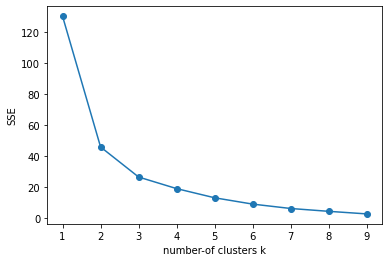

In [103]:
plt.plot(ks,SSE,'-o')
plt.xlabel('number-of clusters k')
plt.ylabel('SSE')
plt.show()

In [107]:
model2 = KMeans(n_clusters=2, init='random', n_init=1,
               max_iter=10, random_state=1).fit(X)
c0, c1 = model2.cluster_centers_ ##군집분석 돌린 결과 새로운 중심이 저장 
c0, c1

(array([5.625, 6.5  ]), array([1.75, 2.5 ]))

In [117]:
model3 = KMeans(n_clusters=3, init='random', n_init=1,
               max_iter=10, random_state=1).fit(X)
c0, c1, c2 = model3.cluster_centers_ ##군집분석 돌린 결과 새로운 중심이 저장 
c0, c1 ,c2

(array([7.  , 6.75]), array([1., 2.]), array([4.2, 5.8]))

In [122]:
#분리도(k=3)
def separation2(model):
    total_mean = np.mean(X[:,0])
    m1 = np.mean(X[model.labels_ == 0,0])
    m2 = np.mean(X[model.labels_ == 1,0])
    m3 = np.mean(X[model.labels_ == 2,0])
    count1 = np.count_nonzero(X[model.labels_ == 0,0])
    count2 = np.count_nonzero(X[model.labels_ == 1,0])
    count3 = np.count_nonzero(X[model.labels_ == 2,0])
    separation = count1*(total_mean - m1)**2 + count2*(total_mean - m2)**2+count3*(total_mean - m3)**2
    print(separation)

In [115]:
model2.score(X),separation(model2),entropy(model2.labels_)

33.36805555555556


In [119]:
model3.score(X),separation2(model3),entropy(model3.labels_)

-26.35